# Chapter 4 — Machine Learning (Code Companion)

This notebook contains the executable code snippets from Chapter 4. Each section starts with a short note describing the goal of the method and how to interpret the output in biomedical applications.

## Supervised Learning

We introduce supervised learning settings and the standard workflow: split data, fit a model, and evaluate generalisation.

### Linear Regression

Linear regression is a baseline for predicting continuous outcomes. The example shows fitting and interpreting a simple model.

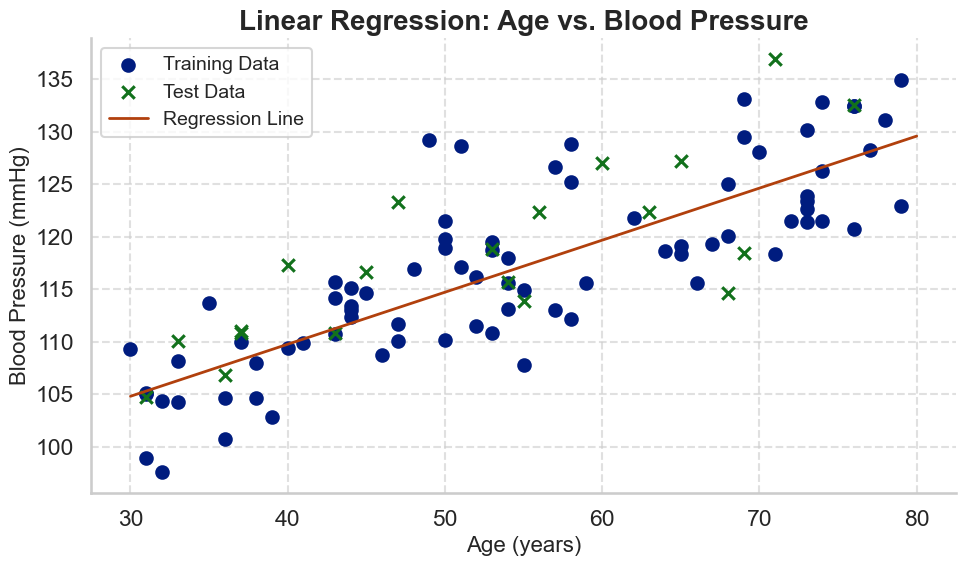

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)  

# Set publication-style aesthetics
sns.set_theme(style="whitegrid", context="talk")

# Generate 100 random samples of ages between 30 and 80
ages = np.random.randint(30, 80, size=(100, 1)) 

# Generate blood pressure labels linearly related to age data plus noise
blood_pressure = 90 + 0.5 * ages + np.random.randn(100, 1) * 5  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ages, blood_pressure, test_size=0.2, random_state=42)

# Create and fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict blood pressure for visualization
age_range = np.array([[30], [80]])
bp_predictions = lin_reg.predict(age_range)

colours = sns.color_palette("dark", n_colors=3) 

# Create the figure
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color=colours[0], label='Training Data')
plt.scatter(X_test, y_test, color=colours[2], label='Test Data', marker='x')
plt.plot(age_range, bp_predictions, color=colours[1], linewidth=2, label='Regression Line')

# Add title, labels, and grid
plt.xlabel('Age (years)', fontsize=16)
plt.ylabel('Blood Pressure (mmHg)', fontsize=16)
plt.title('Linear Regression: Age vs. Blood Pressure', fontsize=20, fontweight='bold')
plt.legend(frameon=True, fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Logistic Regression

Logistic regression is a strong baseline for binary outcomes, producing calibrated probabilities under mild assumptions.

In [2]:
from sklearn.datasets import load_diabetes

# Load a small, fully numeric biomedical-style dataset
data = load_diabetes(as_frame=True)
X = data.data                      # features (n_samples x n_features)
y = data.target                # continuous target (regression)

# Create a binary label from the continuous outcome (classification)
# Example: "high progression" vs "low progression"
threshold = np.median(y)
y_cls = (y >= threshold).astype(int)

# Optional: a single DataFrame for convenience
df = X.copy()
df["target_reg"] = y
df["target_cls"] = y_cls

print("X shape:", X.shape)
print("y_reg range:", (y.min(), y.max()))
print("y_cls balance:", np.bincount(y_cls))

X shape: (442, 10)
y_reg range: (np.float64(25.0), np.float64(346.0))
y_cls balance: [221 221]


In [3]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

### k-Nearest Neighbours

k-NN is a distance-based method: predictions come from the labels of nearby samples. Scaling and dimensionality strongly affect results.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the k-NN model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

### Decision Trees

Decision trees learn human-readable rules by recursively splitting the feature space, but can overfit without constraints.

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

### Ensemble Methods

Ensembles (e.g., random forests) combine many learners to improve performance and robustness, often at the cost of interpretability.

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the random forest model
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

## Unsupervised Learning

We introduce supervised learning settings and the standard workflow: split data, fit a model, and evaluate generalisation.

### Clustering

Clustering groups similar samples without labels. The example demonstrates a standard pipeline and typical outputs.

In [8]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Normalise the data
X_normalized = preprocessing.normalize(X)

# Create and fit K-means model
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init='auto')
kmeans.fit(X_normalized)

# Get the cluster centroids and the label for each datapoint
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

### Dimensionality Reduction

Dimensionality reduction compresses high-dimensional measurements into fewer components for visualisation or downstream modelling.

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardise features (important before PCA)
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Feature Selection

We highlight why selecting informative variables matters in high-dimensional biomedical datasets and show common strategies.

In [10]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Load and standardise data
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
X = StandardScaler().fit_transform(X)

# Initialise the model (used for wrapper and embedded methods)
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000)

# 1. Filter method: SelectKBest (ANOVA F-test)
# Use this when you want to remove irrelevant features using univariate tests quickly.
filter_selector = SelectKBest(score_func=f_classif, k=10)
X_filter = filter_selector.fit_transform(X, y)
filter_selected = filter_selector.get_support(indices=True)

# 2. Wrapper method: Recursive Feature Elimination (RFE)
# Use RFE when you want to optimise model performance while reducing dimensionality.
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
X_rfe = rfe_selector.fit_transform(X, y)
rfe_selected = rfe_selector.get_support(indices=True)

# 3. Embedded method: LASSO (L1 regularisation)
# Use LASSO when you want embedded selection that is fast, interpretable, and robust to correlated features.
model.fit(X, y)
lasso_selected = np.where(model.coef_[0] != 0)[0]

# Display selected feature names for each method
def print_selected(name, indices):
    print(f"\n{name} Selected Features ({len(indices)}):")
    for i in indices:
        print(f"- {feature_names[i]}")

print_selected("Filter (SelectKBest)", filter_selected)
print_selected("Wrapper (RFE)", rfe_selected)
print_selected("Embedded (LASSO)", lasso_selected)


Filter (SelectKBest) Selected Features (10):
- mean radius
- mean perimeter
- mean area
- mean concavity
- mean concave points
- worst radius
- worst perimeter
- worst area
- worst concavity
- worst concave points

Wrapper (RFE) Selected Features (10):
- mean concave points
- radius error
- area error
- compactness error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst concavity
- worst concave points

Embedded (LASSO) Selected Features (8):
- mean concave points
- radius error
- worst radius
- worst texture
- worst smoothness
- worst concavity
- worst concave points
- worst symmetry
